## A Deep Learning-based Model for COVID19 Detection using CT Images


In [ ]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git


Cloning into 'COVID-CT'...
remote: Enumerating objects: 5463, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5463 (delta 0), reused 1 (delta 0), pack-reused 5459
Receiving objects: 100% (5463/5463), 1.09 GiB | 38.23 MiB/s, done.
Resolving deltas: 100% (360/360), done.
Checking out files: 100% (1048/1048), done.


In [ ]:
!unzip '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

Archive:  /content/COVID-CT/Images-processed/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  


In [ ]:
import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="covid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
  dst ="noncovid" + str(count) + ".png"
  src =path+ filename 
  dst =path+ dst 
  # rename() function will 
  # rename all the files 
  os.rename(src, dst)

In [ ]:
# Initiate base directory
base_dir = '/content/covid19_CT'
os.mkdir(base_dir)

In [ ]:
# Create directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'covid')
os.mkdir(train_covid_dir)

train_noncovid_dir = os.path.join(train_dir, 'noncovid')
os.mkdir(train_noncovid_dir)

validation_covid_dir = os.path.join(validation_dir, 'covid')
os.mkdir(validation_covid_dir)

validation_noncovid_dir = os.path.join(validation_dir, 'noncovid')
os.mkdir(validation_noncovid_dir)

test_covid_dir = os.path.join(test_dir, 'covid')
os.mkdir(test_covid_dir)

test_noncovid_dir = os.path.join(test_dir, 'noncovid')
os.mkdir(test_noncovid_dir)

In [ ]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_covid_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_covid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_noncovid_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_noncovid_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training Covid images:', len(os.listdir(train_covid_dir)))
print('total training NonCovid images:', len(os.listdir(train_noncovid_dir)))

print('total validation Covid images:', len(os.listdir(validation_covid_dir)))
print('total validation NonCovid images:', len(os.listdir(validation_noncovid_dir)))

print('total test Covid images:', len(os.listdir(test_covid_dir)))
print('total test NonCovid images:', len(os.listdir(test_noncovid_dir)))

total training Covid images: 250
total training NonCovid images: 250
total validation Covid images: 50
total validation NonCovid images: 50
total test Covid images: 48
total test NonCovid images: 48


In [ ]:
# Create and Compile the Model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 60, 60, 128)     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(500, 500), 
                                                    batch_size=16,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(500, 500),
                                                        batch_size=16,
                                                        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Fit the model 
history = model.fit_generator(train_generator,
                              
                              epochs=20,
                              validation_data=validation_generator,
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
32/32 [==============================] - 10s 228ms/step - loss: 0.6713 - acc: 0.6260 - val_loss: 0.6496 - val_acc: 0.6300
Epoch 2/20
32/32 [==============================] - 6s 199ms/step - loss: 0.6078 - acc: 0.6760 - val_loss: 0.5483 - val_acc: 0.7400
Epoch 3/20
32/32 [==============================] - 6s 196ms/step - loss: 0.4981 - acc: 0.7660 - val_loss: 0.4940 - val_acc: 0.8000
Epoch 4/20
32/32 [==============================] - 6s 197ms/step - loss: 0.3852 - acc: 0.8240 - val_loss: 0.5017 - val_acc: 0.7900
Epoch 5/20
32/32 [==============================] - 6s 199ms/step - loss: 0.3424 - acc: 0.8640 - val_loss: 0.5191 - val_acc: 0.7300
Epoch 6/20
32/32 [==============================] - 6s 199ms/step - loss: 0.2582 - acc: 0.8940 - val_loss: 0.5371 - val_acc: 0.7400
Epoch 7/20
32/32 [==============================] - 6s 198ms/step - loss: 0.1979 - acc: 0.9220 - val_loss: 0.5901 - val_acc: 0.7100
Epoch 8/20
32/32 [==============================] - 7s 231ms/step - loss: 0

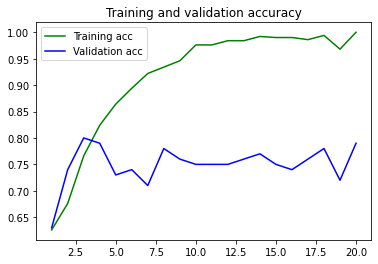

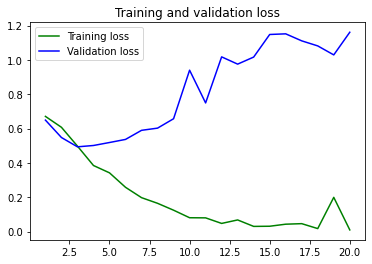

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()